Task 9.1

Заменим переодический пилообразный сигнал на непереодические данные Facebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import decorate
import pandas as pd

C:\Users\lbvfy\AppData\Local\Temp\ipykernel_19736\3458774735.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

if not os.path.exists('FB_2.csv'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/FB_2.csv

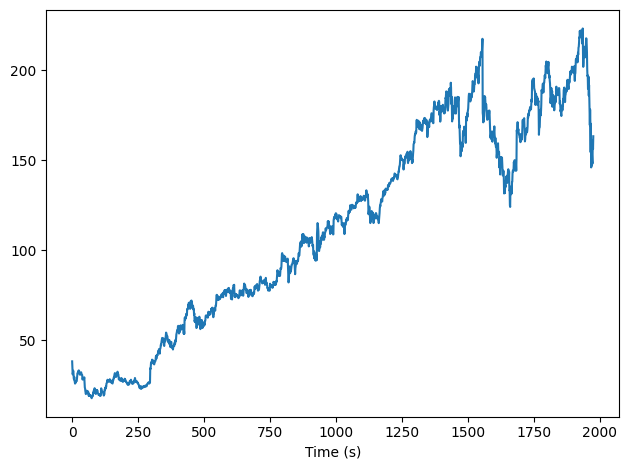

In [8]:
df = pd.read_csv('FB_2.csv', header=0, parse_dates=[0])

from thinkdsp import Wave

ys = df['Close']

if len(ys) % 2:
    ys = ys[:-1]

in_wave = Wave(ys, framerate=1)

in_wave.plot()
decorate(xlabel='Time (s)')


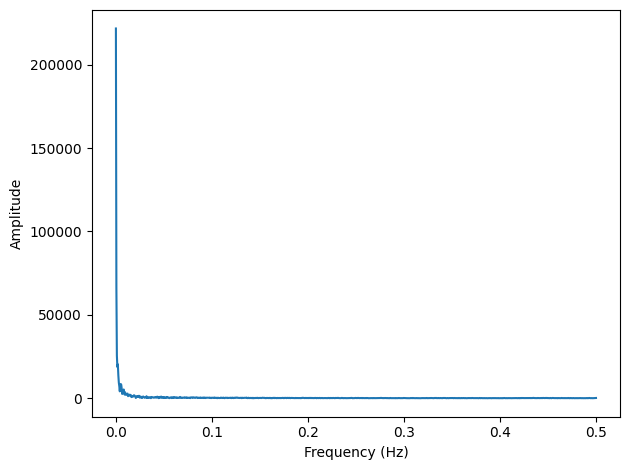

In [9]:
in_spectrum = in_wave.make_spectrum()
in_spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

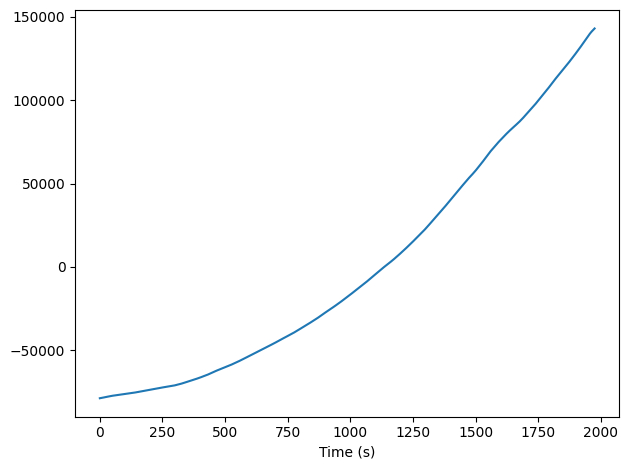

In [10]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
decorate(xlabel='Time (s)')

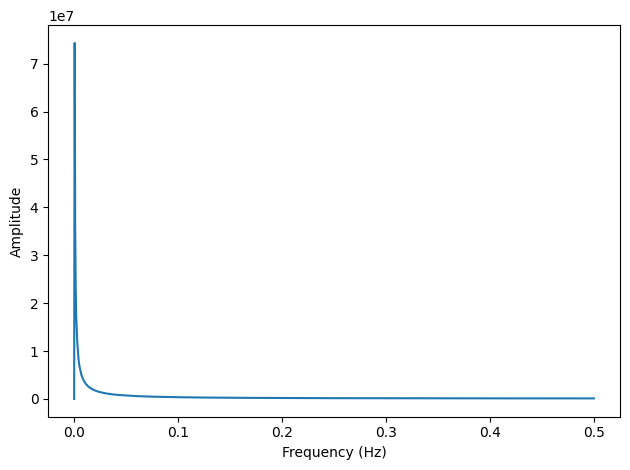

In [11]:
out_spectrum = out_wave.make_spectrum()
out_spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [19]:
from thinkdsp import zero_pad

PI2 = np.pi * 2

# compute the diff filter
diff_window = np.array([1.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()

# compute the cumsum filter by inverting the diff filter
cumsum_filter = diff_filter.copy()
cumsum_filter.hs[1:] = 1 / cumsum_filter.hs[1:]
cumsum_filter.hs[0] = np.inf

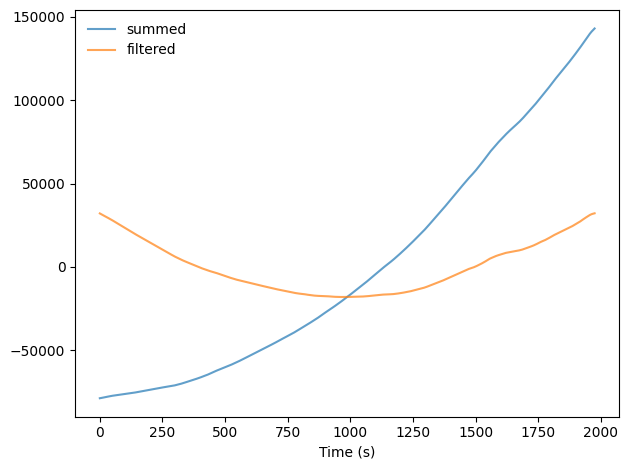

In [20]:
out_wave.plot(label='summed', alpha=0.7)

cumsum_filter.hs[0] = 0
out_wave2 = (in_spectrum * cumsum_filter).make_wave()
out_wave2.plot(label='filtered', alpha=0.7)

decorate(xlabel='Time (s)')

In [21]:
out_wave.max_diff(out_wave2)

110808.40936477095

Как можно заметить, в данном случае теорема о свертке не выполняется для непереодических сигналов

Task 9.2

Изучим воздействие diff и differentiate на треугольный сигнал.

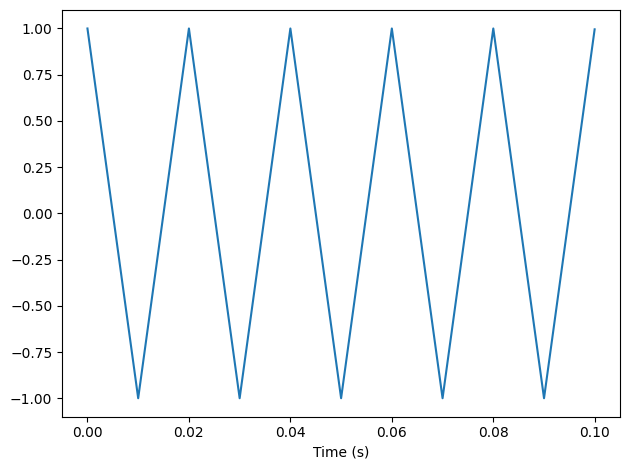

In [22]:
from thinkdsp import TriangleSignal

in_wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

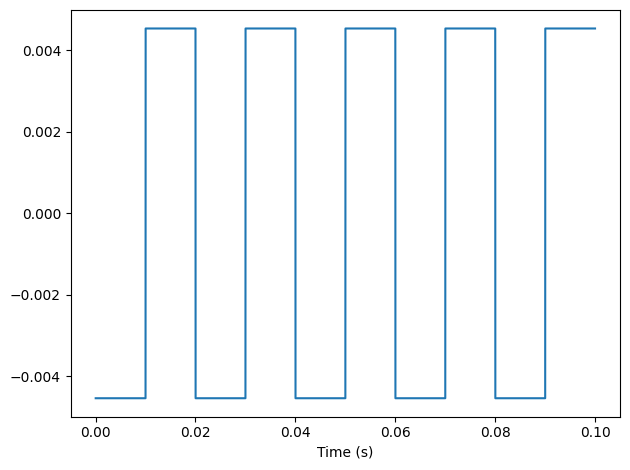

In [23]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Time (s)')

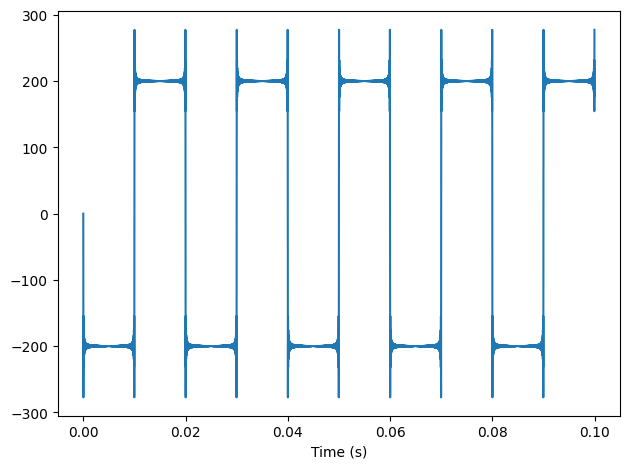

In [24]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

При использовании diff мы получаем обычный прямоугольный сигнал, в то время как differentiate дает сигнал со звоном (колебаниями) в точках для которых производная не определена.

Task 9.3

Изучим влияние cumsum и integrate на прямоугольный сигнал.

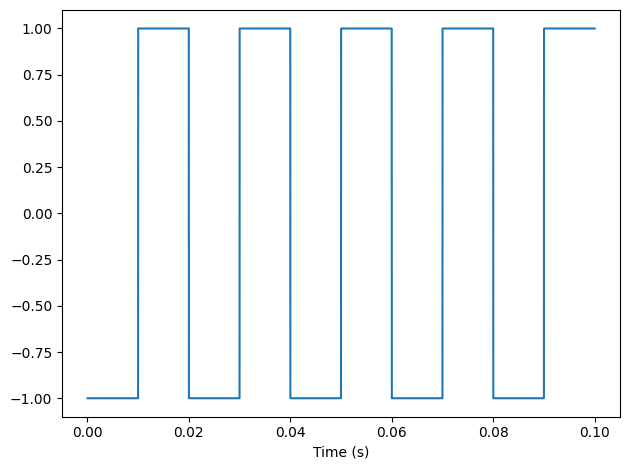

In [25]:
from thinkdsp import SquareSignal

in_wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

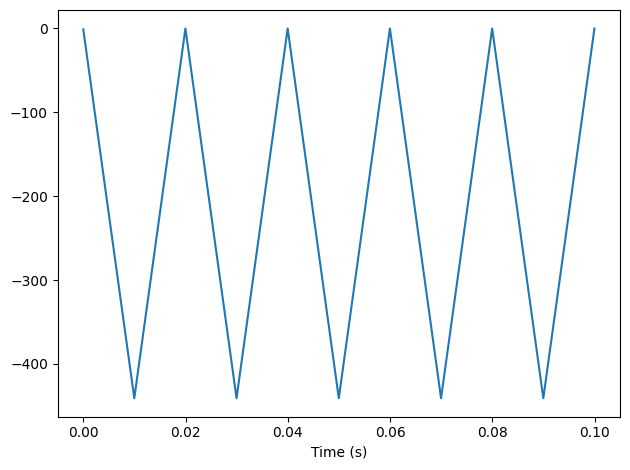

In [26]:
out_wave = in_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

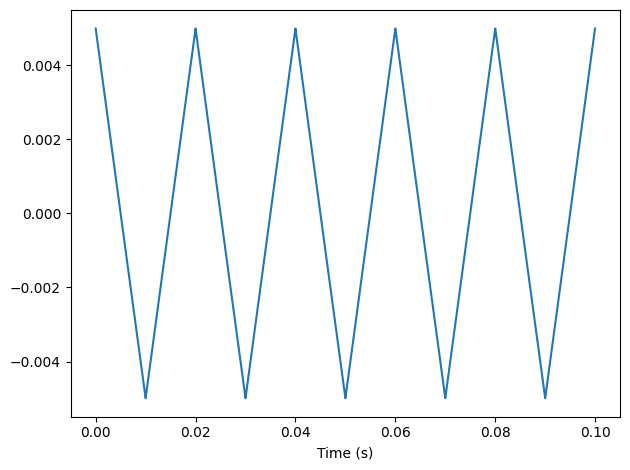

In [27]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

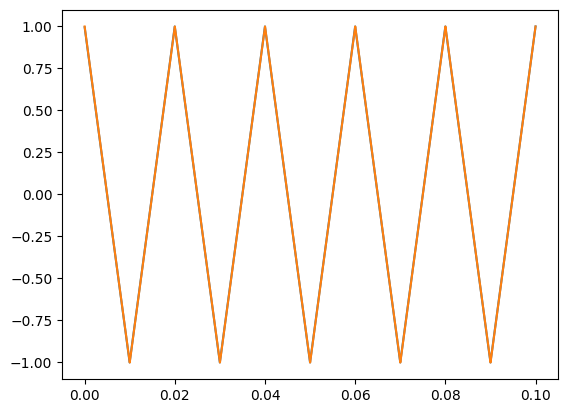

In [28]:
out_wave.unbias()
out_wave.normalize()
out_wave2.normalize()
out_wave.plot()
out_wave2.plot()

Использование cumsum и integrate на прямоугольном сигнале в обоих случаях дает треугольный сигнал, но с различными амплитудами. После нормализации и наложении сигналов каких-либо видимых отличий не зафиксировано.

Task 9.4

Изучим влияние двойного интегрирования на пилообразный сигнал.

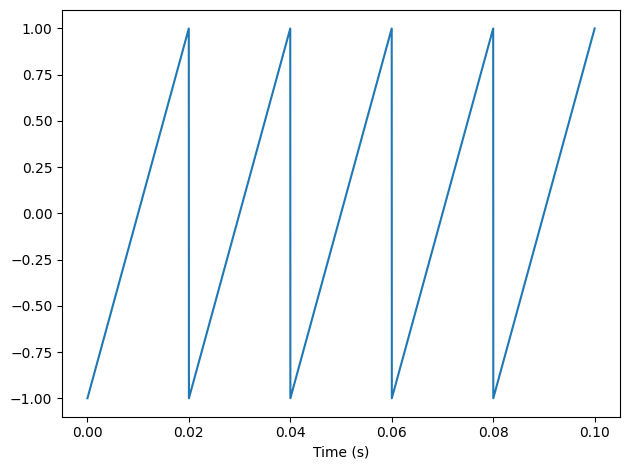

In [29]:
from thinkdsp import SawtoothSignal

in_wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

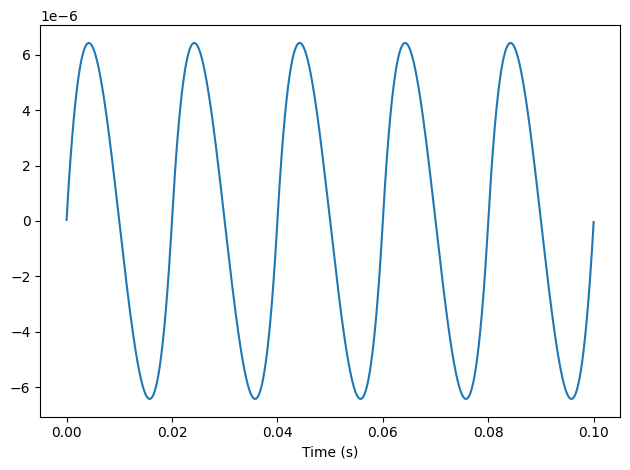

In [32]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

В результате двойного интегрирования пилообразного сигнала был получен кубический сигнал, напоминающий синусоиду. Такой результат объясняется тем, что интегрирование работает для сигнала как фильтр низких частот, и в данном случае мы отбросили почти все компоненты кроме основной частоты.

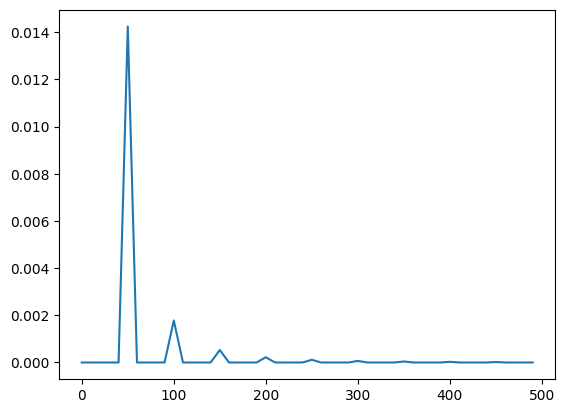

In [33]:
out_wave2.make_spectrum().plot(high=500)

Task 9.5

Изучим влияние второй разности и второй производной на кубический сигнал.

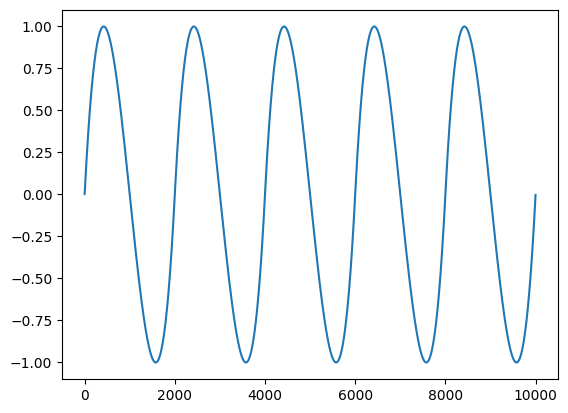

In [38]:
from thinkdsp import CubicSignal

in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

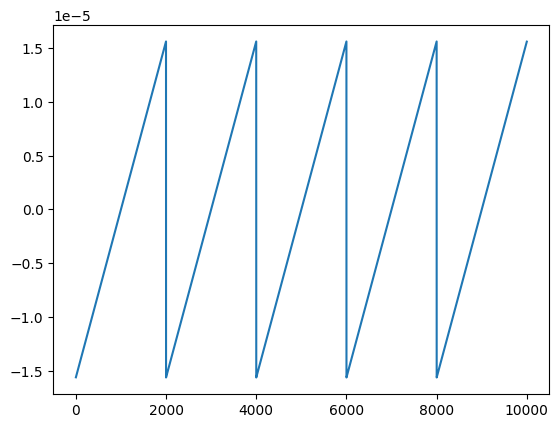

In [39]:
out_wave = in_wave.diff().diff()
out_wave.plot()

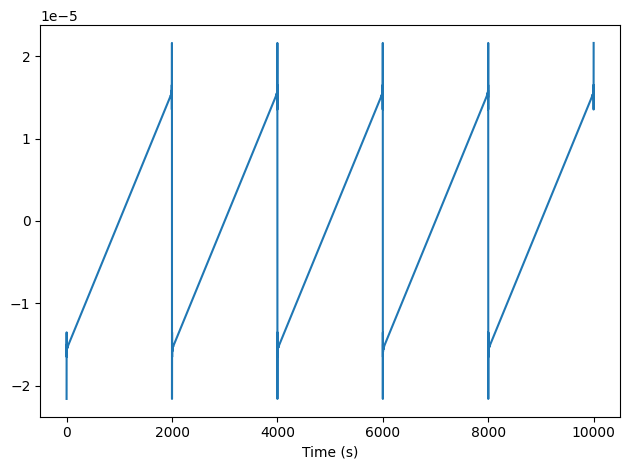

In [40]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

В случае с разностью был получен обычный треугольный сигнал, а вычисление второй производной дало сигнал с уже встречавшимся звоном в местах, где производная не определена. Распечатаем и сравним фильтры, соответствующие второй разнице и второй производной.

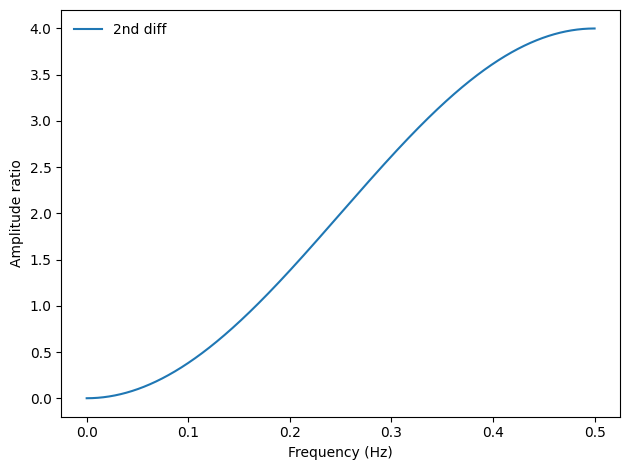

In [41]:
from thinkdsp import zero_pad
from thinkdsp import Wave

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

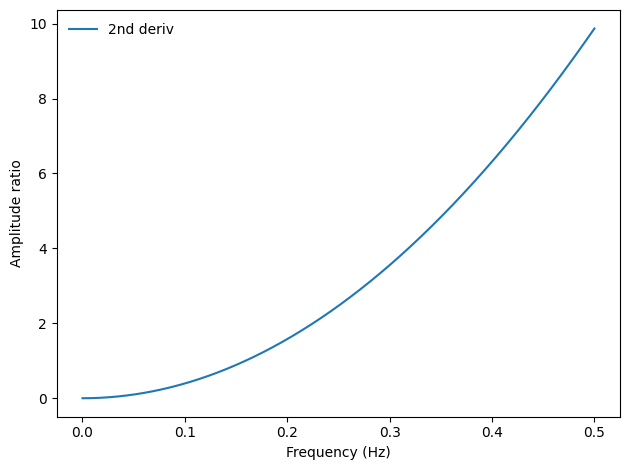

In [42]:
PI2 = np.pi * 2

deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

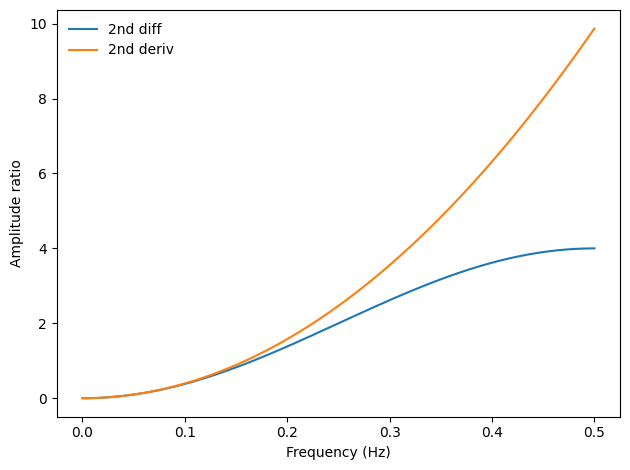

In [43]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Оба фильтра являются фильтрами высоких частот. Однако вторая производная является параболической, а вторая разность приближена к ней лишь на низких частотах. С увеличением частоты вторая разность существенно откланяется от второй произоводной. 